# orbitalthebox.py interactive tutorial

# 1 Getting started

## 1.1 Installing the orbitalthebox package

To run this toturial you must have installed the `orbitalthebox` package in your python environment. If you have not done so already, you can follow the instructions at the [github repository](https://www.github.com/bryanlougheed/orbitalthebox) to install the package to your python environment using the Linux terminal, Windows powershell or equivalent 




## 1.2 Importing packages

After installation, we can import the package into our python session. Here, `orbitalthebox` is imported under the `obox` alias. You could use a different alias if it conflicts with other packages that you have already installed. We will also need `numpy` for handling arrays, and we will also import `matplotlib` so that we can plot some things, as well as the `scipy` signal processing functions. 

In [7]:
import orbitalthebox as obox
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = ["Helvetica", "Arial"]

# 2 Astronomical parameters

## 2.1 Import astronomical parameters

Below, we can use the `getlaskar2004()` function to import the astronomical parameters from the past 10000 kiloyears (10 million years) from Laskar et al. (2004). This will give us the vectos `tka` (time slice interval in ka before 2000 CE) and its associated vectors `ecc` (*eccentricity* ratio of the orbital ellipse, **e**), `obl` (*obliquity* of the ecliptic, **ε**, in radians) and `lpe`. The latter is *longitude of perihelion*, the solar longitude (orbital angle), in radians, of the tropical year where perihelion occurs. Changes in lpe are a result of changes in *general precession*, i.e. the combined effect of *axial precession* and *apsidal precession*. Laskar et al. (2004) give longitude of perihelion relative to the northern hemisphere autumn equinox, referred to as **ω**.


In [8]:
tka, ecc, obl, lpe = obox.getlaskar2004(option=1, timeslice=(500, 0))

## 2.2 Plot astronomical parameters

When plotting, we will convert **ε** and **ω** from radians to degrees for human readability. We will also add 180° to **ω** when plotting so that we show longitude of perihelion relative to northern hemisphere spring equinox (known as $\boldsymbol{\overline{\omega}}$), seeing as the start of the tropical year is typically defined as northern hemipshere spring equinox in climate studies. The current $\boldsymbol{\overline{\omega}}$ is 282.9°, which means that perihelion occurs at a solar longitude (**λ**) of 282.9°. This is in early January, just after the northern hemisphere December winter solstice*. So, for those of you living who experience darkness and cold during January, you can at least take solace in the fact that the Earth is closest to the Sun at that time of the year.

*For reference, where **λ** is the solar longitude (orbit):<br>
**λ** = 0°: northern hemipshere spring equinox<br>
**λ** = 90°: northern hemisphere summer solstice<br>
**λ** = 180°: nothern hemipshere autumn equinox<br>
**λ** = 270°: northern hemisphere winter solstice


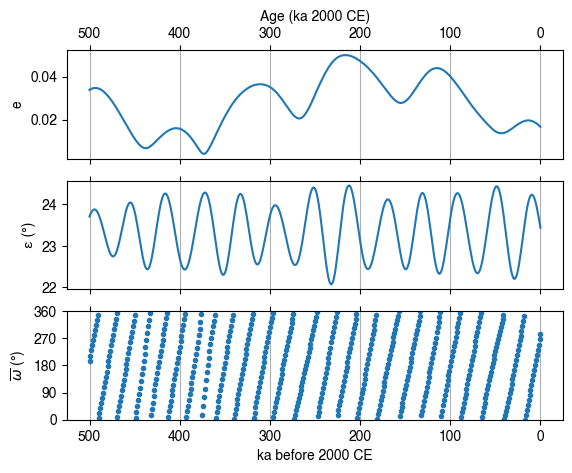

In [9]:
# Eccentricity
plt.subplot(3, 1, 1)
plt.plot(tka, ecc, '-')
plt.ylabel('e')
plt.gca().invert_xaxis()
plt.xlabel('Age (ka 2000 CE)')
plt.grid(axis='x') 
plt.gca().xaxis.set_label_position("top") 
plt.tick_params(top=True, bottom=True, labeltop=True, labelbottom=False)

# Obliquity
plt.subplot(3, 1, 2)
plt.plot(tka, np.rad2deg(obl), '-')
plt.ylabel('ε (°)')
plt.gca().invert_xaxis()
plt.grid(axis='x') 
plt.tick_params(top=True, bottom=True, labeltop=False, labelbottom=False)

# Longitude of perihelion
plt.subplot(3, 1, 3)
omegabar = np.rad2deg(lpe) + 180
omegabar[omegabar>=360] -= 360 # wrap to 0-360 range
plt.plot(tka, omegabar , '.')
plt.ylabel('$\\overline{\\omega}$ (°)')
plt.xlabel('ka before 2000 CE')
plt.gca().invert_xaxis()
plt.grid(axis='x') 
plt.ylim(0,360)
plt.yticks([0, 90, 180, 270, 360])
plt.tick_params(top=True, bottom=True, labeltop=False, labelbottom=True)

## 2.3 Climatic Precession

In the literature, the sine of the $\boldsymbol{\overline{\omega}}$ angle is sometimes plotted (see upper plot below), to produce classic peaks and troughs which palaeoclimatologists invariably interprete as *maximum precession* and *minimum precession*. However, care should be taken when using such terms (or they should perhaps be avoided) seeing as there is no minimum or maximum $\boldsymbol{\overline{\omega}}$, as it is simply any given orbital angle between 0° and 360°. Instead, it is more logical to consider which part of the tropical year coincides with perihelion.

The effect of longitude of perihelion upon Earth's climate is amplified by eccentricity (**e**). In a perfectly circular orbit (**e** = 0), it would be climatically irrelevant where in the orbit perihelion occurs, as the distance of the Sun would be the same for all parts of the orbit, and the speed of the Earth in its orbit around the Sun would also be the same for all parts of the orbit. In a more elliptical orbit, the distance from the Sun varies throughout the orbit, as does the orbital speed of the Earth (faster when closer to the Sun and vice versa). Consequently, both the intensity and length of the seasons can be affected by where in the orbit they occur. To visualise the combined effects of **e** and $\boldsymbol{\overline{\omega}}$, they are sometimes multiplied and plotted as one term: **e**⋅sin($\boldsymbol{\overline{\omega}}$), shown in the lower plot below.  **e**⋅sin($\boldsymbol{\overline{\omega}}$) is sometimes referred to in the literature as *climatic precession*. In the literauture, climatic precession is sometimes plotted as **e**⋅sin(**ω**), i.e. using **ω** instead of $\boldsymbol{\overline{\omega}}$. This approach will invert all the troughs and peaks, so one must be extra careful when reading papers mentioning *minimum* or *maximum* precession.



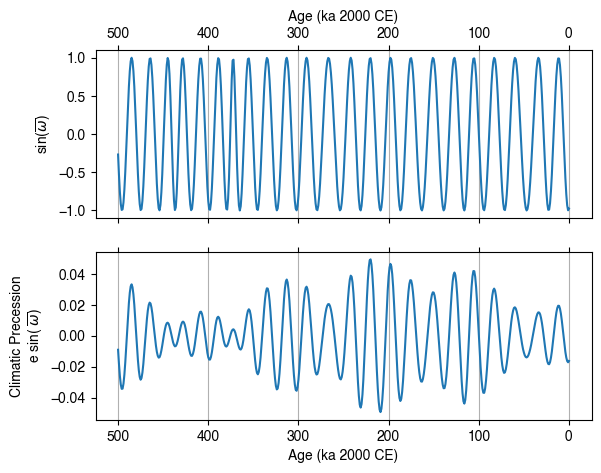

In [4]:
# Sine of omega-bar
plt.subplot(2, 1, 1)
omegabar = np.rad2deg(lpe) + 180
omegabar[omegabar>=360] -= 360 # wrap to 0-360 range
plt.plot(tka, np.sin(np.deg2rad(omegabar)), '-') # np.sin requires radians as input
plt.ylabel('sin($\\overline{\\omega}$)')
plt.xlabel('Age (ka 2000 CE)')
plt.gca().invert_xaxis()
plt.gca().xaxis.set_label_position("top") 
plt.grid(axis='x') 
plt.tick_params(top=True, bottom=True, labeltop=True, labelbottom=False)

# Climatic precession
plt.subplot(2, 1, 2)
omegabar = np.rad2deg(lpe) + 180
omegabar[omegabar>=360] -= 360 # wrap to 0-360 range
plt.plot(tka, ecc*np.sin(np.deg2rad(omegabar)), '-') # np.sin requires radians as input
plt.ylabel('Climatic Precession\ne sin( $\\overline{\\omega}$)')
plt.xlabel('Age (ka 2000 CE)')
plt.gca().invert_xaxis()
plt.grid(axis='x') 
plt.tick_params(top=True, bottom=True, labeltop=False, labelbottom=True)

## 2.4 Power spectral density of astronomical parameters

We can also make use of the `scipy` package to create peridograms to look at the power spectral density of the astronomical parameters eccentricity, obliquity and longitude of perihelion. We will do this on the last 30 million years worth of astronomincal paramaeters, in order to have a good sample size to detect low frequency cycles.

/tmp/ipykernel_15982/3211272357.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/eccfreq, eccpower)
/tmp/ipykernel_15982/3211272357.py:19: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/oblfreq, oblpower)
/tmp/ipykernel_15982/3211272357.py:26: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/lpefreq, lpepower)


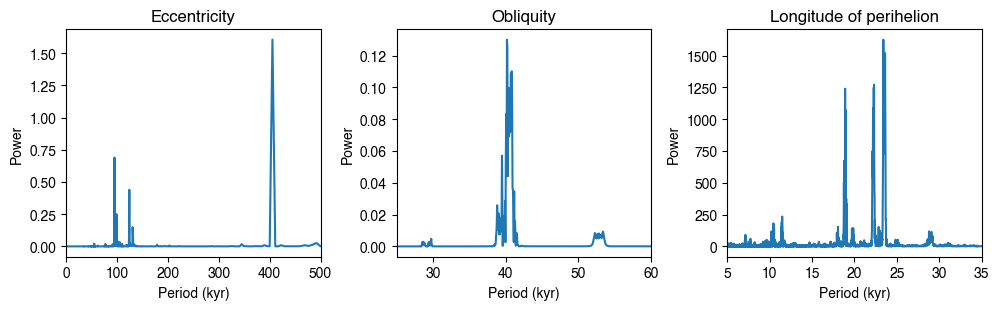

In [10]:
tka, ecc, obl, lpe = obox.getlaskar2004(option=1, timeslice=(30000, 0))

# compute peridodograms
eccfreq, eccpower = sig.periodogram(ecc, fs=1) # sampling frequency (fs) is 1 kyr
oblfreq, oblpower = sig.periodogram(obl, fs=1) # sampling frequency (fs) is 1 kyr
lpefreq, lpepower = sig.periodogram(lpe, fs=1) # sampling frequency (fs) is 1 kyr

# plot periodograms
plt.figure(figsize=(30/2.54, 7.5/2.54)) # 1 inch = 2.54 cm

plt.subplot(1,3,1)
plt.plot(1/eccfreq, eccpower)
plt.xlim(0, 500)
plt.xlabel('Period (kyr)')
plt.ylabel('Power')
plt.title('Eccentricity')

plt.subplot(1,3,2)
plt.plot(1/oblfreq, oblpower)
plt.xlim(25, 60)
plt.xlabel('Period (kyr)')
plt.ylabel('Power')
plt.title('Obliquity')

plt.subplot(1,3,3)
plt.plot(1/lpefreq, lpepower)
plt.xlim(5, 35)
plt.xlabel('Period (kyr)')
plt.ylabel('Power')
plt.title('Longitude of perihelion')

plt.subplots_adjust(wspace=0.3)

# 3 Daily (24 hour) mean irradiance

## 3.1 Northern hemisphere summer solstice daily mean irradiance

Mean daily top of atmosphere "insolation" in Wm<sup>-2</sup> for various latitudes are commonly analysed in the palaeoclimate literature. Insolation* is a scientifically ambiguous term, so we will instead refer to *irradiance* (Wm<sup>-2</sup>). The base unit for energy is the joule (J), and 1 W is equal to 1 Js<sup>-1</sup>. Therefore, irradiance (Wm<sup>-2</sup>) can be thought of as how much energy reaches a one square-metre area per second.

We can use the `dailymeanwm2()` function from orbitalthebox to calculate the popular *northern hemisphere summer solstice daily mean irradiance at 65° N latitude*, for the past 0.5 million years, using the Laskar et al. (2004) astronomical parameters that we imported previously. This function implements the approach described by, e.g., Berger (1978).

`dailymeanwm2()` needs to know at what angle, in radians, in the orbit (`sollon`, or **λ**) relative to the northern hemisphere spring equinox it should calculate 24 hour mean irradiance. The northern hemisphere summer solstice occurs at exactly **λ**=90°, i.e. 90° of orbit after the spring equinox. So, we can input the radian value for 90° ($\pi$/2) for `sollon`, or for convenience we can input `np.deg2rad(90)`.

The function also needs to know at what geocentric latitude on Earth we are interested in, so for `lat` we input `np.deg2rad(+65)`, i.e. 65° N in radians.

The inputs `ecc`, `obl` and `lpe` are loaded directly from the `getlaskar2004()` function. We will look at the past 500 thousand years.

The input `con` is the solar constant (assumed total solar irradiance at 1 AU distance from the Sun). We will use 1361 Wm<sup>-2</sup>.

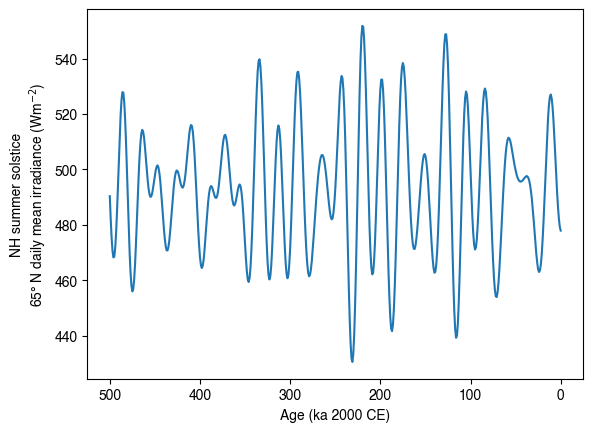

In [11]:
tka, ecc, obl, lpe = obox.getlaskar2004(option=1, timeslice=(500, 0))
irr, dayhrs, rx, tsi = obox.dailymeanwm2(lat=np.deg2rad(+65), sollon=np.deg2rad(90), ecc=ecc, obl=obl, lpe=lpe, con=1361)

# Plot the tka (age in ka) and irradiance
plt.plot(tka, irr)
plt.ylabel('NH summer solstice\n65° N daily mean irradiance (Wm$^{-2}$)')
plt.xlabel('Age (ka 2000 CE)')
plt.gca().invert_xaxis()

The above could be cited as follows: Northern hemisphere summer solstice daily mean irradiance at 65° N calculated following Berger (1978) with the astronomical paramters of Laskar et al. (2004) using *orbitalthebox* (Lougheed, in prep.).

## 3.2 Intra-annual daily mean irradiance

We can also plot an entire tropical year's worth of daily mean irradiance for a particular latitude and period in history. 

### 3.2.1 High latitudes

Here, we will look at the intra-annual irradiance from the last glacial maximum to the start of the Holocene at 65° N, thus covering the period of the last deglaciation.

To look at the intra-annual daily mean irradiance, we first create the vector `dayints` with 0.1 intervals (one tenth of a day) from 0 to 365.2. A daily mean irradiance will be calculated centred on every 0.1 day interval of the year. `dayints` is in the time domain, but `dailymeanwm2` requires `sollon` (**λ**) as input so it knows where in the orbit to calculate the daily mean irradiance. The relationship between time and **λ** is non-linear because the orbital speed of the Earth in its elliptical orbit is not constant. Therefore, we use the function `time2sollon` to convert the day intervals into their associated **λ** using the astronomical parameters of the orbit. `time2sollon` will solve the Kepler equation using an approach developed by Sinnott (1985) and described by Meeus (1998).

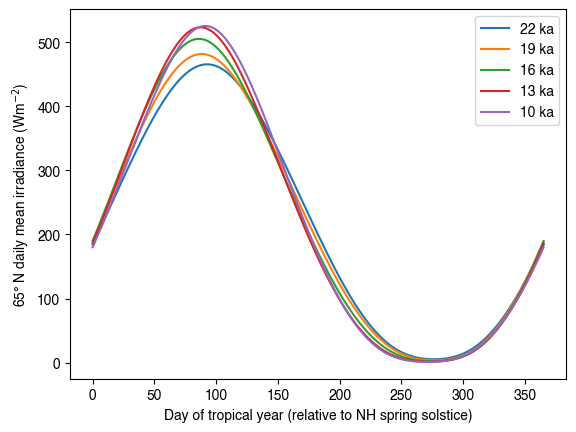

In [33]:
tka, ecc, obl, lpe = obox.getlaskar2004(option=1, timeslice=(25, 0))
dayints = np.arange(0, 365.2, 0.1) # final value will be 365.1. 365.2 = 0.

for i in [22, 19, 16, 13, 10]: # ka to look at
    
    ind = (tka == i)
    
    sollon, eot = obox.time2sollon(dayints, ecc[ind], lpe[ind], tottime=365.2)
    irr, dayhrs, rx, tsi = obox.dailymeanwm2(lat=np.deg2rad(65), sollon=sollon, ecc=ecc[ind], obl=obl[ind], lpe=lpe[ind], con=1361)

    plt.plot(dayints, irr, label=str(i)+' ka')
    plt.ylabel('65° N daily mean irradiance (Wm$^{-2}$)')
    plt.xlabel('Day of tropical year (relative to NH spring solstice)')
    plt.legend()


The above could be cited as follows: Daily mean irradiance calculated following Berger (1978) for 0.1 day intervals with the astronomical paramters of Laskar et al. (2004) using *orbitalthebox* (Lougheed, in prep.), whereby day intervals are converted to solar longitude using the Sinnott (1985) solution for the Kepler equation.

### 3.2.2 Tropics

We can also repeat the above but for the tropics, e.g., 1° N, this time looking at a number of time intervals around the high-eccentricity Eemian (124 ka, 120 ka, 116 ka, 112 ka, 108 ka). We can also look at the distance of the sun throughout the year, which is also outputted from `dailymeanwm2`. The output demonstrates that, unlike at high latitudes, the intra-annual timing of peak irradiance in the tropics is highly dynamic and sensitive to when in the year perihelion occurs, which can have consequences for seasonal timing in the tropics (e.g., Codron, 2001). This is an important aspect for researchers from high-latitude countries to think about when considering tropical seasonality. Unlike high-latitude regions, the past seasonal timing in the tropics is much less constrained with respect to calendar months.

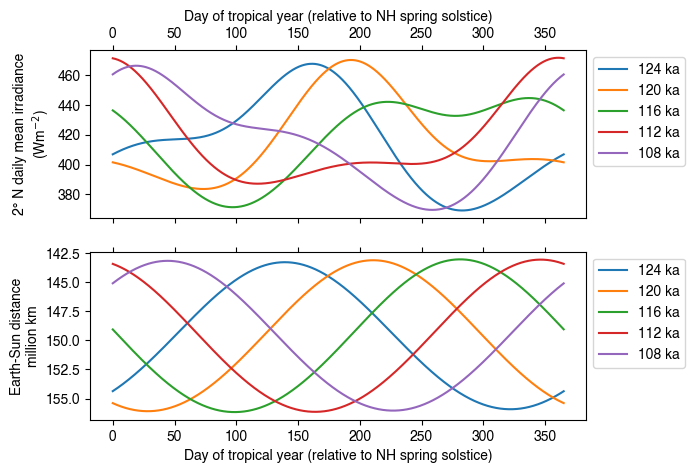

In [37]:
tka, ecc, obl, lpe = obox.getlaskar2004(option=1, timeslice=(125, 105))
dayints = np.arange(0, 365.2, 0.1) # final value will be 365.1. 365.2 = 0.

for i in [124, 120, 116, 112, 108]: # ka to look at

        ind = (tka == i)
      
        sollon, eot = obox.time2sollon(dayints, ecc[ind], lpe[ind], tottime=365.2)
        irr, dayhrs, rx, tsi = obox.dailymeanwm2(lat=np.deg2rad(+1), sollon=sollon, ecc=ecc[ind], obl=obl[ind], lpe=lpe[ind], con=1361)
        rx = rx * 149.598 # convert rx from AU to 10^6 km (1 AU = 149.598 10^6 km)
        
        plt.subplot(2,1,1)
        plt.plot(dayints, irr, label=str(i)+' ka')
        plt.ylabel('2° N daily mean irradiance\n(Wm$^{-2}$)')
        plt.xlabel('Day of tropical year (relative to NH spring solstice)')
        plt.legend(bbox_to_anchor=(1, 1))
        plt.gca().xaxis.set_label_position("top") 
        plt.tick_params(top=True, bottom=True, labeltop=True, labelbottom=False)

        plt.subplot(2,1,2)
        plt.plot(dayints, rx, label=str(i)+' ka')
        plt.ylabel('Earth-Sun distance\nmillion km')
        plt.xlabel('Day of tropical year (relative to NH spring solstice)')
        plt.legend(bbox_to_anchor=(1, 1))
        plt.gca().invert_yaxis()
        plt.tick_params(top=True, bottom=True)

### 3.2.3 All latitudes

We can also create a heatmap for visualising intra-annual daily mean irradiance at all latitudes. To do this efficiently, we will take advantage of the fact that `dailymeanwm2` can operate using vectorised programming (i.e. can accept array input and output corresponding arrays. We will calculate for the present day (0 ka).

In [28]:

tka, ecc, obl, lpe = getlaskar2004(option=1, timeslice=(0, 0))

# Define x and y intervals for the heatmap
dayints = np.arange(0, 365.2, 0.1)
sollons, eot = time2sollon(dayints, ecc, lpe, tottime=365.2)

dayints = dayints.reshape(1,-1)
sollons = sollons.reshape(1,-1)
lats = np.arange(-89.9, 90, 0.1).reshape(-1,1) # will be changed to radians when put into dailymeanwm2

irr, dayhrs, rx, tsi = dailymeanwm2(lat=np.deg2rad(lats), sollon=sollons, ecc=ecc, obl=obl, lpe=lpe, con=1361)

import matplotlib.pyplot as plt
plt.imshow(irr)


ValueError: operands could not be broadcast together with shapes (1799,1) (3652,1) 

# 4 Intra-day irradiance

Thus far we have computed irradiance (Wm<sup>-2</sup>) based on daily (24 hour) means. It is also possible to cal

In [34]:
#4 A number of studies 